<a href="https://colab.research.google.com/github/Shaheer-op9872uw/YachatValAI-V2/blob/main/Yacht_Price_prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Phase 1: Data Prep & Visualization

**Step 1: Setup & Sanity Checks**

In [ ]:
# ========================================
# Phase 1: Data Prep & Visualization
# Step 1: Setup & Sanity Checks
# ========================================

# Install any missing libraries in Colab (just in case)
!pip install seaborn --quiet

# Import core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Torch will be needed later for Cerebra
import torch

# Display settings for pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 3)

# Load dataset (update path if needed)
# If your CSV is in Colab's environment, upload via the file browser or use drive mount
from google.colab import files
uploaded = files.upload()  # You’ll choose the CSV file interactively

# Read the CSV
df = pd.read_csv(list(uploaded.keys())[0])

# Basic shape and preview
print("Shape:", df.shape)
print("\nHead of dataset:\n", df.head())

# Info about datatypes and nulls
print("\nData info:\n")
df.info()

# Quick descriptive stats
print("\nDescriptive statistics:\n", df.describe(include='all'))

# Unique value counts for categoricals
for col in ['Country', 'Type']:
    print(f"\nUnique values in {col}:", df[col].unique())

Saving yacht_prices_25k.csv to yacht_prices_25k (1).csv
Shape: (25000, 6)

Head of dataset:
   Country  YearBuilt     Type  Length_m  BrandPrestige  Price_USD
0  Turkey       2024    Motor     28.12              1  1.023e+06
1   Italy       2024  Sailing      8.55              1  6.338e+04
2   Spain       2021    Motor     30.84              2  1.587e+06
3  France       2022    Motor     26.30              5  2.073e+06
4   Other       2020    Motor     27.44              3  1.184e+06

Data info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Country        25000 non-null  object 
 1   YearBuilt      25000 non-null  int64  
 2   Type           25000 non-null  object 
 3   Length_m       25000 non-null  float64
 4   BrandPrestige  25000 non-null  int64  
 5   Price_USD      25000 non-null  float64
dtypes: float64(2), int64(2), object(2

**Step 2: Data Visualization – Distributions & Correlations**

/tmp/ipython-input-455620161.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='BrandPrestige', data=df, palette="viridis")


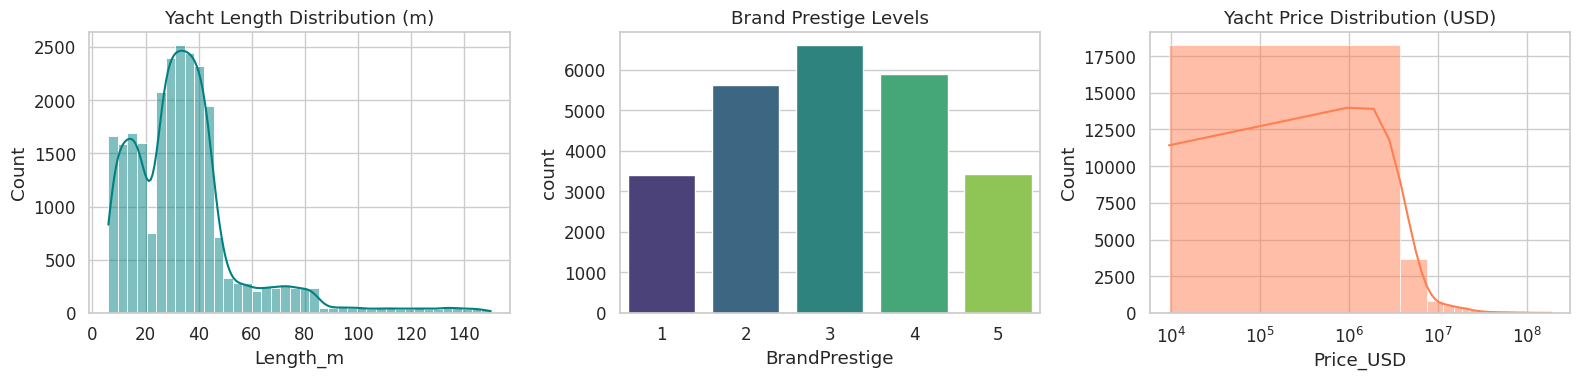

/tmp/ipython-input-455620161.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Type', data=df, order=df['Type'].value_counts().index, palette="Set2")
/tmp/ipython-input-455620161.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Country', data=df, order=df['Country'].value_counts().index, palette="Set3")


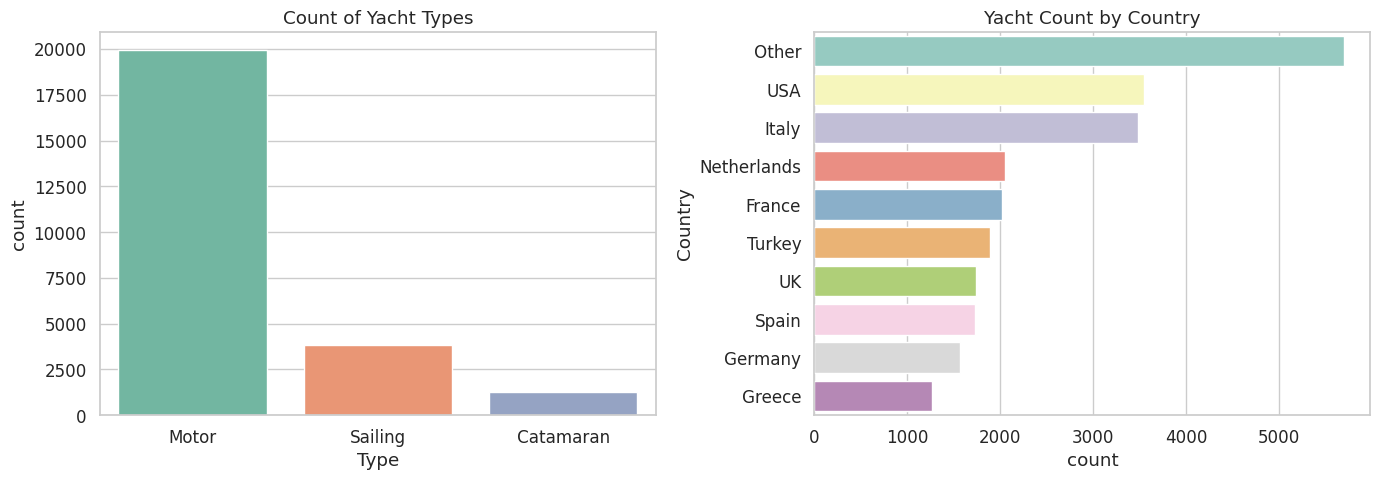

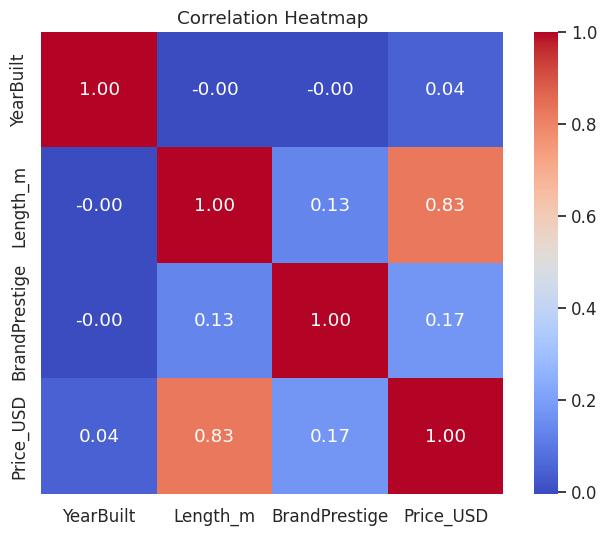

In [ ]:
# ========================================
# Phase 1: Data Prep & Visualization
# Step 2: Data Visualization – Distributions & Correlations
# ========================================

# Set a clean style
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# --- 1. Distribution of numerical features ---
plt.figure(figsize=(16, 4))

plt.subplot(1, 3, 1)
sns.histplot(df['Length_m'], bins=40, kde=True, color="teal")
plt.title("Yacht Length Distribution (m)")

plt.subplot(1, 3, 2)
sns.countplot(x='BrandPrestige', data=df, palette="viridis")
plt.title("Brand Prestige Levels")

plt.subplot(1, 3, 3)
sns.histplot(df['Price_USD'], bins=50, kde=True, color="coral")
plt.title("Yacht Price Distribution (USD)")
plt.xscale("log")  # log scale because of skewed prices

plt.tight_layout()
plt.show()


# --- 2. Categorical counts ---
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.countplot(x='Type', data=df, order=df['Type'].value_counts().index, palette="Set2")
plt.title("Count of Yacht Types")

plt.subplot(1, 2, 2)
sns.countplot(y='Country', data=df, order=df['Country'].value_counts().index, palette="Set3")
plt.title("Yacht Count by Country")

plt.tight_layout()
plt.show()


# --- 3. Correlation heatmap (numerical features only) ---
plt.figure(figsize=(8,6))
corr = df[['YearBuilt', 'Length_m', 'BrandPrestige', 'Price_USD']].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", cbar=True, square=True)
plt.title("Correlation Heatmap")
plt.show()

**Step 3: Feature Engineering & Preprocessing Setup**

In [ ]:
# --- Step 3: Feature Engineering & Preprocessing Setup ---

from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode categorical variables (Country, Type)
le_country = LabelEncoder()
le_type = LabelEncoder()

df['Country_encoded'] = le_country.fit_transform(df['Country'])
df['Type_encoded'] = le_type.fit_transform(df['Type'])

# Features (X) and Target (y)
X = df[['Country_encoded', 'YearBuilt', 'Type_encoded', 'Length_m', 'BrandPrestige']]
y = df['Price_USD']

# Scale features (important for Cerebra / ML models)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Encoded + Scaled feature matrix shape:", X_scaled.shape)
print("Target vector shape:", y.shape)

# Quick preview of transformed features
pd.DataFrame(X_scaled, columns=['Country', 'YearBuilt', 'Type', 'Length_m', 'BrandPrestige']).head()

Encoded + Scaled feature matrix shape: (25000, 5)
Target vector shape: (25000,)


,Country,YearBuilt,Type,Length_m,BrandPrestige
0,0.801,1.289,-0.233,-0.301,-1.613
1,-0.674,1.289,2.048,-1.193,-1.613
2,0.432,-0.259,-0.233,-0.177,-0.811
3,-1.780,0.257,-0.233,-0.384,1.593
4,0.063,-0.775,-0.233,-0.332,-0.010


# Phase 2: Model Training + Interactive Prediction

**Step 1: Train-Test Split + Cerebra-style Model Setup**

In [4]:
# ============================================
# Phase 2 — Step 1
# Train-Test Split + Cerebra-style Model Setup
# (no external cerebra package; we implement it here)
# ============================================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import torch
import torch.nn as nn
import torch.nn.functional as F # Import functional module

# -------------------------------
# 0) Data → One-hot → Scale
# -------------------------------
# Reuse df from Phase 1 if it exists; otherwise load
try:
    df
except NameError:
    df = pd.read_csv("yacht_prices_25k.csv")

# Split features/target
X_raw = df.drop(columns=["Price_USD"]).copy()
y_raw = df["Price_USD"].values.astype(np.float32)

# One-hot encode categoricals (keep all levels; no drop_first to make CLI simpler)
X_encoded = pd.get_dummies(X_raw, columns=["Country", "Type"])
feature_names = X_encoded.columns.tolist()

# Scale ALL features (NN-friendly; consistent at inference)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded).astype(np.float32)

# log1p target for stability (we'll invert later when reporting)
y_log = np.log1p(y_raw).astype(np.float32)

# Train/test split (keep raw y for later inverse-transform eval)
X_train, X_test, ylog_train, ylog_test, yraw_train, yraw_test = train_test_split(
    X_scaled, y_log, y_raw, test_size=0.20, random_state=42
)

print("Train X:", X_train.shape, " Test X:", X_test.shape)
print("Train y (log):", ylog_train.shape, " Test y (log):", ylog_test.shape)

# Torch tensors + device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
X_train_t = torch.from_numpy(X_train).to(device)
y_train_t = torch.from_numpy(ylog_train).unsqueeze(1).to(device)  # (N,1)
X_test_t  = torch.from_numpy(X_test).to(device)
y_test_t  = torch.from_numpy(ylog_test).unsqueeze(1).to(device)

input_dim = X_train.shape[1]

# ------------------------------------------------
# 1) Cerebra-style gated residual block (PyTorch)
#    - LayerNorm for stability
#    - GLU-style gating: (A * sigmoid(B))
#    - Residual + learnable skip scaling
# ------------------------------------------------
class CerebraBlock(nn.Module):
    def __init__(self, dim, hidden, dropout=0.05):
        super().__init__()
        self.ln1 = nn.LayerNorm(dim)
        self.fc_in = nn.Linear(dim, 2*hidden)        # → split into A,B
        self.act = nn.SiLU()                          # smooth nonlinearity
        self.dropout = nn.Dropout(dropout)
        self.proj = nn.Linear(hidden, dim)
        # learnable residual mix (start near identity)
        self.alpha = nn.Parameter(torch.tensor(0.5))

    def forward(self, x):
        # Pre-norm
        z = self.ln1(x)
        u = self.fc_in(z)
        A, B = torch.chunk(u, 2, dim=-1)
        gated = self.act(A) * torch.sigmoid(B)        # GLU-ish
        gated = self.dropout(gated)
        out = self.proj(gated)
        # Residual with learnable blend
        return self.alpha * x + (1.0 - self.alpha) * out

# ------------------------------------------------
# 2) Cerebra-style Regressor: stack of blocks
# ------------------------------------------------
class CerebraRegressorLite(nn.Module):
    def __init__(self, input_dim, widths=(128, 128, 64), dropout=0.05):
        super().__init__()
        dims = [input_dim] + list(widths)
        self.inp = nn.Linear(input_dim, dims[1])
        blocks = []
        for i in range(1, len(dims)-1):
            blocks.append(CerebraBlock(dims[i], dims[i], dropout=dropout))
        self.blocks = nn.Sequential(*blocks)
        self.head = nn.Sequential(
            nn.LayerNorm(dims[-1]), # Corrected normalized_shape to match the output of the last block
            nn.Linear(dims[-1], 1)   # predict log-price
        )
        self._init_weights()

    def _init_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.kaiming_uniform_(m.weight, a=0.2)
                if m.bias is not None:
                    nn.init.zeros_(m.bias)

    def forward(self, x):
        h = F.silu(self.inp(x)) # Use F.silu
        h = self.blocks(h)
        out = self.head(h)
        return out  # (N,1) log-price

# Instantiate the model
model = CerebraRegressorLite(
    input_dim=input_dim,
    widths=(128, 128, 64),
    dropout=0.05
).to(device)

# Loss & optimizer (Cerebra repo trains with Adam + MSE on regression)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-6)

# Handy: count params
n_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"✅ Cerebra-style model ready on {device}. Trainable params: {n_params:,}")

# Store artifacts for Step 3 (CLI) & Step 2 (training loop)
CEREBRA_FEATURE_NAMES = feature_names
CEREBRA_SCALER = scaler
Y_TEST_RAW = yraw_test  # keep for inverse-transform metrics later

FileNotFoundError: [Errno 2] No such file or directory: 'yacht_prices_25k.csv'

**Step 2: Model Training (Full training on dataset)**

In [ ]:
!pip install torch torchvision torchaudio --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 888.1/888.1 MB 757.1 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 594.3/594.3 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 59.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.0/88.0 MB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 954.8/954.8 kB 45.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 706.8/706.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.1/193.1 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.6/63.6 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 267.5/267.5 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.2/288.2 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.2/287.2 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322

In [6]:
# ============================================
# Phase 2 — Step 2: Model Training (Full training on dataset)
# Drop this cell into Colab and run. It:
# - Loads yacht_prices_25k.csv
# - Preprocesses (one-hot DF -> StandardScaler fit on DataFrame)
# - Splits (train/val/test = 80/10/10)
# - Trains a Cerebra-style PyTorch regressor on log1p(price)
# - Saves artifacts needed by Phase 2 Step 3 (model, scaler, feature names, calibration/resid stats)
# - Exposes variables: model, CEREBRA_SCALER, CEREBRA_FEATURE_NAMES, X_train_t, y_train_t, X_test_t, Y_TEST_RAW, CALIB_FACTOR, RESID_STD
# ============================================

# ---------- Imports & reproducibility ----------
import random, os, math
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib
import torch
import torch.nn as nn
import torch.nn.functional as F # Import functional module
from torch.utils.data import TensorDataset, DataLoader
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

RND = 42
random.seed(RND)
np.random.seed(RND)
torch.manual_seed(RND)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(RND)

# ---------- Config ----------
CSV_PATH = "yacht_prices_25k.csv"
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
BATCH_SIZE = 256
EPOCHS = 60
LR = 1e-3
WEIGHT_DECAY = 1e-6
PATIENCE = 8          # early stopping patience (val loss)
VERBOSE = True        # set False to mute per-epoch prints

# ---------- 1) Load & Preprocess ----------
df = pd.read_csv(CSV_PATH)

# Keep original df copy for diagnostics if needed
DF_RAW = df.copy()

# Separate X/y
y_raw = df["Price_USD"].astype(float).values  # keep raw USD
X_df = df.drop(columns=["Price_USD"])

# One-hot encode categoricals into a DataFrame (keeps column names/order)
X_df_enc = pd.get_dummies(X_df, columns=["Country", "Type"])

# Save feature names (exact order)
CEREBRA_FEATURE_NAMES = list(X_df_enc.columns)

# Fit scaler on DataFrame (so transform later with same columns -> no warnings)
scaler = StandardScaler()
scaler.fit(X_df_enc)   # fit on entire DF (alternatively fit only on train if desired)

# Scale -> numpy float32
X_scaled = scaler.transform(X_df_enc).astype(np.float32)
y_log = np.log1p(y_raw).astype(np.float32)   # model will predict log1p(price)

# Train/Val/Test split: first train + temp, then split temp into val/test
X_temp, X_test, ytemp_log, y_test_log, ytemp_raw, y_test_raw = train_test_split(
    X_scaled, y_log, y_raw, test_size=0.10, random_state=RND
)
# Now split X_temp -> train (80%) and val (10%)
# because we took 10% for test already, split remaining 90% into 80/10 -> train 88.89%, val 11.11% of original
val_ratio = 0.11111111111  # so final split is ~80/10/10
X_train, X_val, y_train_log, y_val_log = train_test_split(
    X_temp, ytemp_log, test_size=val_ratio, random_state=RND
)

# Convert to torch tensors
X_train_t = torch.from_numpy(X_train).to(DEVICE)
y_train_t = torch.from_numpy(y_train_log).unsqueeze(1).to(DEVICE)
X_val_t   = torch.from_numpy(X_val).to(DEVICE)
y_val_t   = torch.from_numpy(y_val_log).unsqueeze(1).to(DEVICE)
X_test_t  = torch.from_numpy(X_test).to(DEVICE)
y_test_t  = torch.from_numpy(y_test_log).unsqueeze(1).to(DEVICE)

# Expose raw test USD for CLI usage later
Y_TEST_RAW = y_test_raw.astype(float)

# ---------- 2) Cerebra-style model definition (robust) ----------
class CerebraBlock(nn.Module):
    def __init__(self, dim, dropout=0.05):
        super().__init__()
        self.ln = nn.LayerNorm(dim)
        self.fc = nn.Linear(dim, dim * 2)   # split to A and B
        self.act = nn.SiLU()
        self.proj = nn.Linear(dim, dim)
        self.drop = nn.Dropout(dropout)
        self.alpha = nn.Parameter(torch.tensor(0.5))

    def forward(self, x):
        z = self.ln(x)
        u = self.fc(z)
        A, B = torch.chunk(u, 2, dim=-1)
        gated = self.act(A) * torch.sigmoid(B)
        gated = self.drop(gated)
        out = self.proj(gated)
        return self.alpha * x + (1.0 - self.alpha) * out

class CerebraRegressor(nn.Module):
    def __init__(self, input_dim, widths=(256, 192, 128), dropout=0.05):
        super().__init__()
        self.input_proj = nn.Linear(input_dim, widths[0])
        self.blocks = nn.ModuleList([CerebraBlock(w) for w in widths])
        # if widths list has more than 1, connect dims by linear layers
        self.inter = nn.ModuleList()
        for i in range(len(widths)-1):
            self.inter.append(nn.Linear(widths[i], widths[i+1]))
        self.head_ln = nn.LayerNorm(widths[-1])
        self.head = nn.Linear(widths[-1], 1)  # predict log-price

        # init
        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.kaiming_uniform_(m.weight, a=0.2)
                if m.bias is not None:
                    nn.init.zeros_(m.bias)

    def forward(self, x):
        h = F.silu(self.input_proj(x)) # Use F.silu
        for i, block in enumerate(self.blocks):
            h = block(h)
            if i < len(self.inter):
                h = F.silu(self.inter[i](h)) # Use F.silu
        out = self.head(self.head_ln(h))
        return out

# Instantiate
input_dim = X_train.shape[1]
model = CerebraRegressor(input_dim=input_dim, widths=(256,192,128), dropout=0.06).to(DEVICE)

# Loss & optimizer & scheduler
criterion = nn.MSELoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=LR, weight_decay=WEIGHT_DECAY)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, factor=0.5, patience=4) # Removed verbose=False

# Count params
n_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
if VERBOSE: print(f"Model ready on {DEVICE}; params: {n_params:,}")

# ---------- 3) Training loop with early stopping ----------
train_ds = TensorDataset(X_train_t, y_train_t)
train_loader = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True, drop_last=False)

best_val = float("inf")
best_epoch = 0
best_state = None
train_losses = []
val_losses = []
patience_ctr = 0

for epoch in range(1, EPOCHS + 1):
    model.train()
    total_loss = 0.0
    for xb, yb in train_loader:
        optimizer.zero_grad()
        preds = model(xb)
        loss = criterion(preds, yb)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * xb.size(0)
    avg_train = total_loss / len(train_loader.dataset)
    train_losses.append(avg_train)

    model.eval()
    with torch.no_grad():
        val_preds = model(X_val_t)
        val_loss = criterion(val_preds, y_val_t).item()
    val_losses.append(val_loss)
    scheduler.step(val_loss)

    if VERBOSE:
        print(f"Epoch {epoch:03d} | Train MSE: {avg_train:.6f} | Val MSE: {val_loss:.6f}")

    # early stop logic
    if val_loss < best_val - 1e-6:
        best_val = val_loss
        best_epoch = epoch
        best_state = {k: v.cpu() for k, v in model.state_dict().items()}
        patience_ctr = 0
    else:
        patience_ctr += 1
        if patience_ctr >= PATIENCE:
            if VERBOSE: print(f"Early stopping at epoch {epoch}. Best epoch {best_epoch}.")
            break

# restore best weights
if best_state is not None:
    model.load_state_dict(best_state)

# ---------- 4) Evaluation on test set (convert back to USD) ----------
model.eval()
with torch.no_grad():
    ylog_test_pred = model(X_test_t).cpu().numpy().squeeze()
y_pred_test = np.expm1(ylog_test_pred)
y_true_test = Y_TEST_RAW.astype(float)

rmse = math.sqrt(mean_squared_error(y_true_test, y_pred_test))
mae = mean_absolute_error(y_true_test, y_pred_test)
r2 = r2_score(y_true_test, y_pred_test)

if VERBOSE:
    print("\nTest set metrics (USD scale):")
    print(f" RMSE: ${rmse:,.2f}")
    print(f" MAE : ${mae:,.2f}")
    print(f" R²  : {r2:.4f}")

# ---------- 5) Calibration & residual stats for CLI ----------
# median ratio calibration (clamped)
preds_nonzero = np.maximum(y_pred_test, 1.0)
med_ratio = float(np.median(y_true_test) / max(1.0, np.median(preds_nonzero)))
med_ratio = max(0.2, min(med_ratio, 5.0))
CALIB_FACTOR = med_ratio

# residual std (USD)
RESID_STD = float(np.std(y_true_test - y_pred_test))

if VERBOSE:
    print(f"\nCalibration factor (median ratio) applied for CLI: {CALIB_FACTOR:.3f}")
    print(f"Residual std on test (USD): ${RESID_STD:,.2f}")

# ---------- 6) Save artifacts for Phase 2 Step 3 (CLI) ----------
ARTIFACT_DIR = "cerebra_artifacts"
os.makedirs(ARTIFACT_DIR, exist_ok=True)

# save full model (recommended) and state_dict
torch.save(model, os.path.join(ARTIFACT_DIR, "cerebra_model_full.pt"))
torch.save(model.state_dict(), os.path.join(ARTIFACT_DIR, "cerebra_model_state_dict.pt"))

# save scaler & feature names & calibration/resid as joblib
joblib.dump(scaler, os.path.join(ARTIFACT_DIR, "scaler.joblib"))
joblib.dump(CEREBRA_FEATURE_NAMES, os.path.join(ARTIFACT_DIR, "feature_names.joblib"))
joblib.dump({"calib_factor": CALIB_FACTOR, "resid_std": RESID_STD}, os.path.join(ARTIFACT_DIR, "calib_resid.joblib"))

# Also expose these variables in the notebook namespace for CLI cells that follow
CEREBRA_SCALER = scaler
CEREBRA_FEATURE_NAMES = CEREBRA_FEATURE_NAMES
CALIB_FACTOR = CALIB_FACTOR
RESID_STD = RESID_STD

# keep train arrays (optional) for market compare
try:
    X_train_saved = X_train    # numpy scaled train features
    y_train_saved = np.expm1(y_train_log)  # approximate train USD (from log) - only if needed
    # expose as names other cells expect:
    X_train = X_train_saved
    yraw_train = y_train_saved
except Exception:
    pass

# final information
if VERBOSE:
    print(f"\nArtifacts saved to: {ARTIFACT_DIR}")
    print("Variables available in notebook: model, CEREBRA_SCALER, CEREBRA_FEATURE_NAMES, X_train_t, y_train_t, X_test_t, Y_TEST_RAW, CALIB_FACTOR, RESID_STD")

Model ready on cuda; params: 438,020
Epoch 001 | Train MSE: 9.056586 | Val MSE: 0.284588
Epoch 002 | Train MSE: 0.232632 | Val MSE: 0.101916
Epoch 003 | Train MSE: 0.137047 | Val MSE: 0.062454
Epoch 004 | Train MSE: 0.092562 | Val MSE: 0.046114
Epoch 005 | Train MSE: 0.070271 | Val MSE: 0.033169
Epoch 006 | Train MSE: 0.058597 | Val MSE: 0.033155
Epoch 007 | Train MSE: 0.050161 | Val MSE: 0.032409
Epoch 008 | Train MSE: 0.044402 | Val MSE: 0.028707
Epoch 009 | Train MSE: 0.040757 | Val MSE: 0.032010
Epoch 010 | Train MSE: 0.038514 | Val MSE: 0.038944
Epoch 011 | Train MSE: 0.035401 | Val MSE: 0.024720
Epoch 012 | Train MSE: 0.033583 | Val MSE: 0.024939
Epoch 013 | Train MSE: 0.031533 | Val MSE: 0.026260
Epoch 014 | Train MSE: 0.029454 | Val MSE: 0.023018
Epoch 015 | Train MSE: 0.028614 | Val MSE: 0.023321
Epoch 016 | Train MSE: 0.027453 | Val MSE: 0.029161
Epoch 017 | Train MSE: 0.025444 | Val MSE: 0.022937
Epoch 018 | Train MSE: 0.024742 | Val MSE: 0.021383
Epoch 019 | Train MSE: 0.02

**Step 3: CLI Prediction Control Panel (sequential Q&A → single prediction)**

In [7]:
# ==============================================
# Phase 2 — Step 3: CLI Prediction Control Panel
# Usage: run_control_panel()
# Requirements (must exist in notebook):
#   model, CEREBRA_SCALER, CEREBRA_FEATURE_NAMES, CALIB_FACTOR, RESID_STD, X_test_t, Y_TEST_RAW
# ==============================================

import numpy as np
import pandas as pd
import torch
import difflib
import math

# ---------- sanity checks ----------
_required = ["model", "CEREBRA_SCALER", "CEREBRA_FEATURE_NAMES"]
_missing = [v for v in _required if v not in globals()]
if _missing:
    raise RuntimeError(f"Missing objects in notebook: {_missing}. Run Phase2 Step2 training cell first.")

feature_names = list(CEREBRA_FEATURE_NAMES)
scaler = CEREBRA_SCALER
device = next(model.parameters()).device

# if calibration/resid were saved as different names, try to pick them up; else compute safe defaults
CALIB = globals().get("CALIB_FACTOR", globals().get("CALIB_FACTOR", 1.0))
RESID = globals().get("RESID_STD", globals().get("RESID_STD", 1.0))

# Derive available categories
_country_cols = [c for c in feature_names if c.startswith("Country_")]
_type_cols    = [c for c in feature_names if c.startswith("Type_")]
AVAILABLE_COUNTRIES = [c.split("Country_",1)[1] for c in _country_cols]
AVAILABLE_TYPES     = [t.split("Type_",1)[1] for t in _type_cols]

# ---------- helpers ----------
def pretty_currency(x):
    if x is None or (isinstance(x, float) and (math.isnan(x) or math.isinf(x))):
        return "N/A"
    x = float(x)
    if x >= 1e9: return f"${x/1e9:,.2f}B"
    if x >= 1e6: return f"${x/1e6:,.2f}M"
    if x >= 1e3: return f"${x/1e3:,.2f}k"
    return f"${x:,.2f}"

def find_close(val, choices):
    if val in choices: return val
    m = difflib.get_close_matches(val, choices, n=1, cutoff=0.5)
    return m[0] if m else None

# Build DataFrame row matching training columns (keeps exact columns -> safe for scaler.transform)
def build_row_df(country, yearbuilt, typ, length_m, brandprestige):
    row = {c: 0.0 for c in feature_names}
    # set numeric fields (prefer exact names)
    def set_if_exists(key, val):
        if key in row:
            row[key] = float(val); return True
        for fn in feature_names:
            if key in fn and ("Country_" not in fn and "Type_" not in fn):
                row[fn] = float(val); return True
        return False
    set_if_exists("YearBuilt", yearbuilt)
    if not set_if_exists("Length_m", length_m):
        set_if_exists("Length", length_m)
    set_if_exists("BrandPrestige", brandprestige)

    # one-hot country/type (fuzzy match)
    ckey = f"Country_{country}"
    if ckey in row:
        row[ckey] = 1.0
    else:
        alt = find_close(country, AVAILABLE_COUNTRIES)
        if alt:
            row[f"Country_{alt}"] = 1.0

    tkey = f"Type_{typ}"
    if tkey in row:
        row[tkey] = 1.0
    else:
        alt = find_close(typ, AVAILABLE_TYPES)
        if alt:
            row[f"Type_{alt}"] = 1.0

    return pd.DataFrame([row], columns=feature_names)

# Core predict function
def predict_single(country, yearbuilt, typ, length_m, brandprestige, apply_calib=True):
    # normalize via fuzzy matching
    c_norm = find_close(country, AVAILABLE_COUNTRIES) or country
    t_norm = find_close(typ, AVAILABLE_TYPES) or typ
    df_row = build_row_df(c_norm, yearbuilt, t_norm, length_m, brandprestige)
    X_scaled = scaler.transform(df_row)  # safe: DataFrame -> preserves names/order
    xt = torch.from_numpy(X_scaled.astype(np.float32)).to(device)
    model.eval()
    with torch.no_grad():
        ylog = model(xt).cpu().numpy().squeeze()
    yusd = float(np.expm1(ylog))
    if apply_calib:
        yusd *= float(CALIB)
    # 95% approx interval using RESID
    z = 1.96
    lower = max(0.0, yusd - z * float(RESID))
    upper = yusd + z * float(RESID)
    return {
        "pred": yusd,
        "lower": lower,
        "upper": upper,
        "country_used": c_norm,
        "type_used": t_norm,
        "calibration": float(CALIB),
        "resid_std": float(RESID)
    }

# ---------- CONTROL PANEL (sequential Q&A) ----------
def run_control_panel():
    print("\n🔷 ACE Control Panel — sequential Q&A (CLI)")
    print("You'll be asked 5 questions. Type 'q' at any prompt to quit.\n")
    # Q1: Country
    while True:
        print("Q1) Country (e.g., Turkey). Sample countries:", ", ".join(AVAILABLE_COUNTRIES[:8]), "...")
        country = input("Answer: ").strip()
        if country.lower() == 'q':
            print("Quit."); return
        if country == "":
            print("Please enter a country name."); continue
        # show detected mapping if fuzzy
        detected = find_close(country, AVAILABLE_COUNTRIES)
        if detected and detected.lower() != country.lower():
            print(f" → Interpreting as: {detected}")
            country = detected
        break

    # Q2: BrandPrestige
    while True:
        print("\nQ2) BrandPrestige (1=low-end ... 5=ultra-premium).")
        bp = input("Answer (1-5): ").strip()
        if bp.lower() == 'q':
            print("Quit."); return
        try:
            bpv = int(bp)
            if 1 <= bpv <= 5:
                break
            else:
                print("Enter integer between 1 and 5.")
        except:
            print("Invalid. Enter integer 1 to 5.")

    # Q3: Type
    while True:
        print("\nQ3) Type (Motor / Sailing / Catamaran).")
        typ = input("Answer: ").strip()
        if typ.lower() == 'q':
            print("Quit."); return
        if typ == "":
            print("Enter a type.")
            continue
        detected = find_close(typ, AVAILABLE_TYPES)
        if detected and detected.lower() != typ.lower():
            print(f" → Interpreting as: {detected}")
            typ = detected
        break

    # Q4: Length_m
    while True:
        print("\nQ4) Length in meters (example: 32.5).")
        length = input("Answer: ").strip()
        if length.lower() == 'q':
            print("Quit."); return
        try:
            length_f = float(length)
            if length_f <= 0:
                print("Length must be positive.")
                continue
            break
        except:
            print("Invalid number. Try again (e.g., 40 or 32.5).")

    # Q5: YearBuilt
    while True:
        print("\nQ5) Year built (e.g., 2022).")
        year = input("Answer: ").strip()
        if year.lower() == 'q':
            print("Quit."); return
        try:
            year_i = int(year)
            if 1900 <= year_i <= 2025:
                break
            else:
                print("Enter a reasonable year (e.g., 2018-2024).")
        except:
            print("Invalid year. Try again (e.g., 2022).")

    # do prediction
    print("\nCalculating fair price... 🔮")
    out = predict_single(country, year_i, typ, length_f, bpv, apply_calib=True)

    # print result
    print("\n" + "="*46)
    print(f"Input normalized: Country={out['country_used']}, Type={out['type_used']}, Year={year_i}, Length={length_f} m, Prestige={bpv}")
    print(f"🔮 Predicted fair price: {pretty_currency(out['pred'])}")
    print(f"📉 95% approx interval: {pretty_currency(out['lower'])} — {pretty_currency(out['upper'])}")
    print(f"(Calibration factor: {out['calibration']:.3f} · resid_std ≈ ${out['resid_std']:,.0f})")
    print("="*46 + "\n")

# Ready
print("Control panel ready. Call run_control_panel() to start the sequential Q&A CLI.")

Control panel ready. Call run_control_panel() to start the sequential Q&A CLI.


In [8]:
run_control_panel()


🔷 ACE Control Panel — sequential Q&A (CLI)
You'll be asked 5 questions. Type 'q' at any prompt to quit.

Q1) Country (e.g., Turkey). Sample countries: France, Germany, Greece, Italy, Netherlands, Other, Spain, Turkey ...
Answer: Turkey

Q2) BrandPrestige (1=low-end ... 5=ultra-premium).
Answer (1-5): 3

Q3) Type (Motor / Sailing / Catamaran).
Answer: Motor

Q4) Length in meters (example: 32.5).
Answer: 70

Q5) Year built (e.g., 2022).
Answer: 2010

Calculating fair price... 🔮

Input normalized: Country=Turkey, Type=Motor, Year=2010, Length=70.0 m, Prestige=3
🔮 Predicted fair price: $6.57M
📉 95% approx interval: $3.55M — $9.58M
(Calibration factor: 0.997 · resid_std ≈ $1,539,048)

